# Red Neuronal de Regresión (*vino.csv*)

Instrucciones:
 1. Descarga el dataset *vino.csv* y guárdalo en la carpeta */datasets/*.
 2. Completa el código del *notebook*.

Crea una red neuronal para predecir la **calidad** de un vino según su **densidad, ph y alcohol**.

In [92]:
# Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Librerías para el preprocesamiento de los datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Librerías para crear la red neuronal
from keras import Sequential
from keras.layers import Input, Dense

## 1. Leer la información del *dataset vino.csv*

In [93]:
data = pd.read_csv('Datasets/vino.csv')
data

,acidez fija,acidez volátil,ácido cítrico,azúcar residual,cloruros,dióxido de azufre libre,dióxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## 2. Separar las variables de entrada y de salida de la red

In [94]:
# Datos de entrada -> densidad, pH y alcohol
X = data[['densidad', 'pH', 'alcohol']]
X

,densidad,pH,alcohol
0,0.99780,3.51,9.4
1,0.99680,3.20,9.8
2,0.99700,3.26,9.8
3,0.99800,3.16,9.8
4,0.99780,3.51,9.4
...,...,...,...
1594,0.99490,3.45,10.5
1595,0.99512,3.52,11.2
1596,0.99574,3.42,11.0
1597,0.99547,3.57,10.2


In [95]:
# Salida -> calorías
y = data['calidad']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: calidad, Length: 1599, dtype: int64

## 3. Graficar la información para visualizar su distribución

Text(0.5, 0, 'Alcohol')

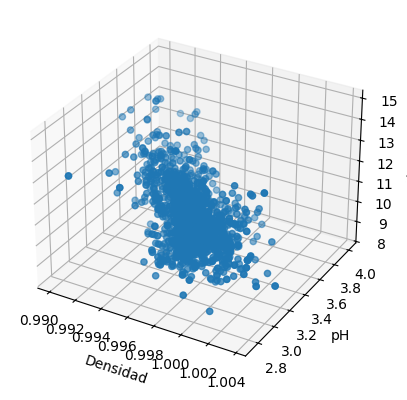

In [96]:
# Crear figura y ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# Graficar puntos en 3D
ax.scatter(X['densidad'], X['pH'], X['alcohol'])

# Etiquetas
ax.set_xlabel('Densidad')
ax.set_ylabel('pH')
ax.set_zlabel('Alcohol')

## 4. Separar los datos de entrenamiento, de validación y de prueba

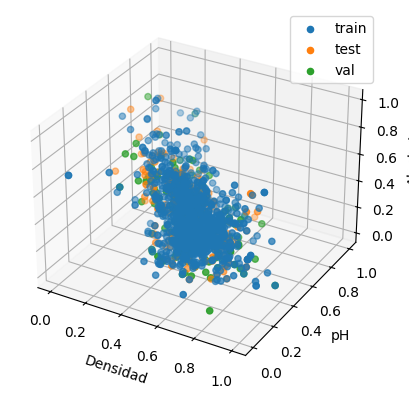

In [97]:
# Seprar datos de entrenamiento (70%), de validación (15%) y de prueba (15%)
X_train, X_test, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_temp, test_size=0.5, random_state=42
)

# Normalizar los datos, utilizando los valores de entrenamiento para normalizar los datos de prueba
normalizer = MinMaxScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_val_norm = normalizer.transform(X_val)

# Crear figura y ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# Graficar puntos en 3D
ax.scatter(X_train_norm[:, 0], X_train_norm[:, 1], X_train_norm[:, 2], label = 'train')
ax.scatter(X_test_norm[:, 0], X_test_norm[:, 1], X_test_norm[:, 2], label = 'test')
ax.scatter(X_val_norm[:, 0], X_val_norm[:, 1], X_val_norm[:, 2], label = 'val')

# Etiquetas
ax.set_xlabel('Densidad')
ax.set_ylabel('pH')
ax.set_zlabel('Alcohol')
ax.legend()

## 5. Crear una arquitectura para la red

In [98]:
model = Sequential([
    # Capa de entrada
    Input([3]),
    # Capas ocultas
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    # Capa de salida
    Dense(1, activation = 'linear')
])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

## 6. Compilar y entrenar la red

In [99]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
history = model.fit(X_train_norm, y_train, validation_data = (X_val_norm, y_val), epochs = 300)

Epoch 1/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 28.6808 - mae: 5.2888 - val_loss: 24.3543 - val_mae: 4.8734
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.6810 - mae: 3.9567 - val_loss: 8.3468 - val_mae: 2.7780
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6970 - mae: 1.3249 - val_loss: 0.7877 - val_mae: 0.6791
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7570 - mae: 0.6702 - val_loss: 0.7475 - val_mae: 0.6661
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6950 - mae: 0.6396 - val_loss: 0.7175 - val_mae: 0.6512
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6781 - mae: 0.6278 - val_loss: 0.6996 - val_mae: 0.6436
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6624 - mae: 0.6200 - val_loss: 0.6824 - val_mae: 0.6364
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6482 - mae: 0.6121 - val_loss: 0.6822 - val_mae: 0.6404
Epoch 9/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0

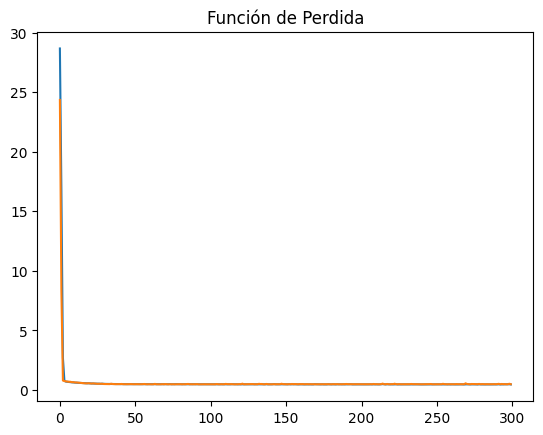

In [100]:
history_df = pd.DataFrame(history.history)

plt.title('Función de Perdida')
plt.plot(history_df['loss'], label = 'train_loss')
plt.plot(history_df['val_loss'], label = 'val_loss')

## 7. Evaluar los resultados

In [101]:
loss, mae = model.evaluate(X_test_norm, y_test)
print(f'La red puede predecir las calorías de un cereal con un error de: {mae}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5062 - mae: 0.5669
La red puede predecir las calorías de un cereal con un error de: 0.5668700933456421


### Calcular el error en los datos de entrenamiento

In [102]:
Y_pred_train = model.predict(X_train_norm)
error_train = abs(np.array(y_train) - Y_pred_train[0])
error_train

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([1.34996367, 0.65003633, 0.65003633, ..., 0.65003633, 1.34996367,
       0.34996367], shape=(1119,))

### Calcular el error en los datos de validación

In [103]:
Y_pred_val = model.predict(X_val_norm)
error_val = abs(np.array(y_val) - Y_pred_val[0])
error_val

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([0.09019613, 0.90980387, 0.90980387, 0.90980387, 0.09019613,
       0.90980387, 0.09019613, 1.90980387, 0.90980387, 0.90980387,
       0.09019613, 0.09019613, 0.90980387, 0.09019613, 0.90980387,
       0.09019613, 0.90980387, 0.90980387, 0.90980387, 1.90980387,
       0.90980387, 0.09019613, 0.09019613, 0.90980387, 0.09019613,
       0.90980387, 0.09019613, 0.09019613, 0.90980387, 2.90980387,
       1.90980387, 0.09019613, 0.90980387, 0.09019613, 1.90980387,
       0.90980387, 0.09019613, 1.90980387, 1.90980387, 0.09019613,
       0.90980387, 0.90980387, 0.09019613, 0.90980387, 0.90980387,
       0.09019613, 0.90980387, 0.90980387, 0.90980387, 0.90980387,
       0.90980387, 0.09019613, 0.09019613, 0.09019613, 0.90980387,
       0.09019613, 0.90980387, 1.90980387, 0.90980387, 0.90980387,
       1.09019613, 0.09019613, 0.09019613, 0.90980387, 1.90980387,
       0.90980387, 0.09019613, 0.90980387, 0.09019613, 0.09019613,
       0.90980387, 0.09019613, 0.90980387, 0.09019613, 0.90980

### Calcular el error en los datos de prueba

In [104]:
Y_pred_test = model.predict(X_test_norm)
error_test = abs(np.array(y_test) - Y_pred_test[0])
error_test

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([0.29324436, 0.70675564, 1.29324436, 0.29324436, 1.29324436,
       1.29324436, 0.29324436, 0.29324436, 0.70675564, 0.29324436,
       0.29324436, 0.70675564, 0.70675564, 0.29324436, 0.70675564,
       0.70675564, 0.29324436, 0.70675564, 0.70675564, 0.70675564,
       1.70675564, 0.70675564, 0.29324436, 0.70675564, 0.29324436,
       0.70675564, 1.70675564, 0.29324436, 0.70675564, 0.29324436,
       0.70675564, 2.70675564, 0.70675564, 1.29324436, 0.70675564,
       0.29324436, 1.29324436, 0.29324436, 1.70675564, 2.29324436,
       0.29324436, 0.70675564, 1.29324436, 0.29324436, 0.29324436,
       0.70675564, 0.70675564, 2.29324436, 0.70675564, 0.29324436,
       0.29324436, 0.29324436, 1.29324436, 1.29324436, 0.70675564,
       0.29324436, 0.70675564, 0.70675564, 0.29324436, 0.70675564,
       0.70675564, 0.29324436, 0.29324436, 0.70675564, 0.70675564,
       0.29324436, 0.29324436, 0.29324436, 0.29324436, 0.29324436,
       0.29324436, 0.29324436, 0.29324436, 0.29324436, 0.29324

Text(0.5, 0, 'Alcohol')

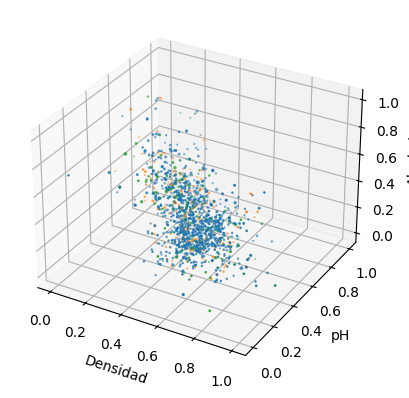

In [105]:
# Crear figura y ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# Graficar puntos en 3D
ax.scatter(X_train_norm[:, 0], X_train_norm[:, 1], X_train_norm[:, 2], label = 'train', s = error_train)
ax.scatter(X_test_norm[:, 0], X_test_norm[:, 1], X_test_norm[:, 2], label = 'test', s = error_test)
ax.scatter(X_val_norm[:, 0], X_val_norm[:, 1], X_val_norm[:, 2], label = 'val', s = error_val)

# Etiquetas
ax.set_xlabel('Densidad')
ax.set_ylabel('pH')
ax.set_zlabel('Alcohol')